In [1]:
# Initial imports
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
# Read in the data
file_path_ad_clean = "../Raw_data/application_data_cleaned_ros.csv"
df = pd.read_csv(file_path_ad_clean)
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
3,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
4,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Split the data into Defaulters vs Non-Defaulters
df_defaulters = df[df['TARGET']==1]
df_normal = df[df['TARGET']==0]

# Gender

In [5]:
# Group by gender (defaulters)
gender_group_defaulters = df_defaulters.groupby("CODE_GENDER")["CODE_GENDER"].count()
gender_group_defaulters

CODE_GENDER
F    7781
M    6426
Name: CODE_GENDER, dtype: int64

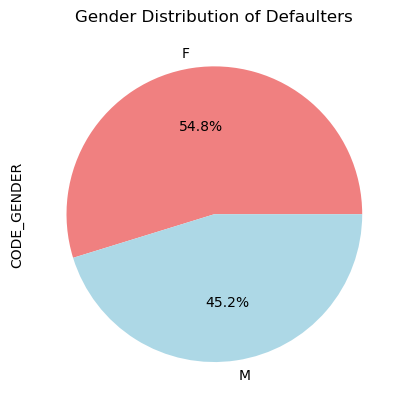

In [7]:
# Display a pie chart of the gender distribution for defaulters
colours = ['lightcoral', 'lightblue']
pie_gender_defaulters = gender_group_defaulters.plot(kind="pie", autopct='%1.1f%%', colors=colours)
plt.title("Gender Distribution of Defaulters")
# Save Figure for use later
plt.savefig("figures\GenderDist-Defaulters")
plt.show()

In [8]:
# Group by gender (non-defaulters)
gender_group_normal = df_normal.groupby("CODE_GENDER")["CODE_GENDER"].count()
gender_group_normal

CODE_GENDER
F      95956
M      57567
XNA        2
Name: CODE_GENDER, dtype: int64

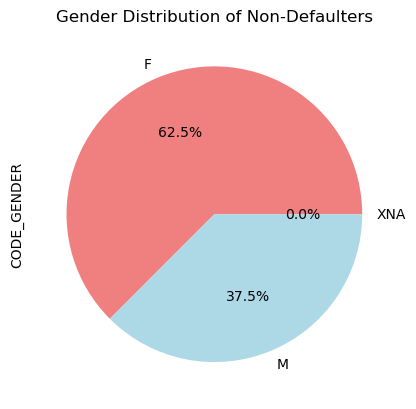

In [9]:
# Display a pie chart of the gender distribution for non-defaulters
colours = ['lightcoral', 'lightblue']
pie_gender_normal = gender_group_normal.plot(kind="pie", autopct='%1.1f%%', colors=colours)
plt.title("Gender Distribution of Non-Defaulters")
# Save Figure for use later
plt.savefig("figures\GenderDist-NonDefaulters")
plt.show()

# Age

In [10]:
# get the age from the "DAYS_BIRTH" column 
df['years_birth'] = -(df['DAYS_BIRTH']//365)
df_defaulters['years_birth'] = -(df_defaulters['DAYS_BIRTH']//365)
df_normal['years_birth'] = -(df_normal['DAYS_BIRTH']//365)

C:\Users\Rachel\AppData\Local\Temp\ipykernel_151216\543717587.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defaulters['years_birth'] = -(df_defaulters['DAYS_BIRTH']//365)
C:\Users\Rachel\AppData\Local\Temp\ipykernel_151216\543717587.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal['years_birth'] = -(df_normal['DAYS_BIRTH']//365)


In [63]:
print(df_defaulters['years_birth'].describe())
print("")
print(f"The mean age of credit card defaulters is {df_defaulters['years_birth'].mean()}")
print(f"The minimum age of credit card defaulters is {df_defaulters['years_birth'].min()}")
print(f"The maximum age of credit card defaulters is {df_defaulters['years_birth'].max()}")

count    14207.000000
mean        39.079116
std          9.542554
min         22.000000
25%         31.000000
50%         38.000000
75%         46.000000
max         69.000000
Name: years_birth, dtype: float64

The mean age of credit card defaulters is 39.07911592876751
The minimum age of credit card defaulters is 22
The maximum age of credit card defaulters is 69


In [64]:
print(df_normal['years_birth'].describe())
print("")
print(f"The mean age of non credit card defaulters is {df_normal['years_birth'].mean()}")
print(f"The minimum age of non credit card defaulters is {df_normal['years_birth'].min()}")
print(f"The maximum age of non credit card defaulters is {df_normal['years_birth'].max()}")

count    153525.000000
mean         41.463670
std           9.851373
min          22.000000
25%          34.000000
50%          41.000000
75%          49.000000
max          70.000000
Name: years_birth, dtype: float64

The mean age of non credit card defaulters is 41.46367041198502
The minimum age of non credit card defaulters is 22
The maximum age of non credit card defaulters is 70


# Employment

## Days Employed

In [18]:
# get years employed from the "DAYS_EMPLOYED" column
df["years_employed"] = -(df['DAYS_EMPLOYED']//365)
df["years_employed"].describe()

count    167732.000000
mean          7.278820
std           6.566976
min           0.000000
25%           3.000000
50%           5.000000
75%          10.000000
max          50.000000
Name: years_employed, dtype: float64

In [19]:
df_defaulters['years_employed'] = -(df_defaulters['DAYS_EMPLOYED']//365)
df_normal['years_employed'] = -(df_normal['DAYS_EMPLOYED']//365)

C:\Users\Rachel\AppData\Local\Temp\ipykernel_151216\1492442050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defaulters['years_employed'] = -(df_defaulters['DAYS_EMPLOYED']//365)
C:\Users\Rachel\AppData\Local\Temp\ipykernel_151216\1492442050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal['years_employed'] = -(df_normal['DAYS_EMPLOYED']//365)


In [66]:
print(df_normal['years_employed'].describe())
print("")
print(f"The mean number of years employed of non credit card defaulters is {df_normal['years_employed'].mean()}")
print(f"The minimum number of years employed of non credit card defaulters is {df_normal['years_employed'].min()}")
print(f"The maximum number of years employed of non credit card defaulters is {df_normal['years_employed'].max()}")

count    153525.000000
mean          7.431128
std           6.661603
min           1.000000
25%           3.000000
50%           5.000000
75%          10.000000
max          50.000000
Name: years_employed, dtype: float64

The mean number of years employed of non credit card defaulters is 7.431128480703468
The minimum number of years employed of non credit card defaulters is 1
The maximum number of years employed of non credit card defaulters is 50


In [68]:
print(df_defaulters['years_employed'].describe())
print("")
print(f"The mean number of years employed of credit card defaulters is {df_defaulters['years_employed'].mean()}")
print(f"The minimum number of years employed of credit card defaulters is {df_defaulters['years_employed'].min()}")
print(f"The maximum number of years employed of credit card defaulters is {df_defaulters['years_employed'].max()}")

count    14207.000000
mean         5.632927
std          5.161428
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         45.000000
Name: years_employed, dtype: float64

The mean number of years employed of credit card defaulters is 5.632927430140072
The minimum number of years employed of credit card defaulters is 0
The maximum number of years employed of credit card defaulters is 45


In [48]:
# max years employed is 50, min is 0

# create the bins and labels for "years_employed"
bins_years_employed = [0,5,10,15,20,30,40,50]
labels = ["0-5 years", "5-10 years", "10-15 years", "15-20 years", "20-30 years", "30-40 years", "40-50 years"]

In [49]:
df_normal["years_employed_binned"] = pd.cut(df_normal['years_employed'], bins=bins_years_employed, labels=labels)

C:\Users\Rachel\AppData\Local\Temp\ipykernel_151216\2848140139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal["years_employed_binned"] = pd.cut(df_normal['years_employed'], bins=bins_years_employed, labels=labels)


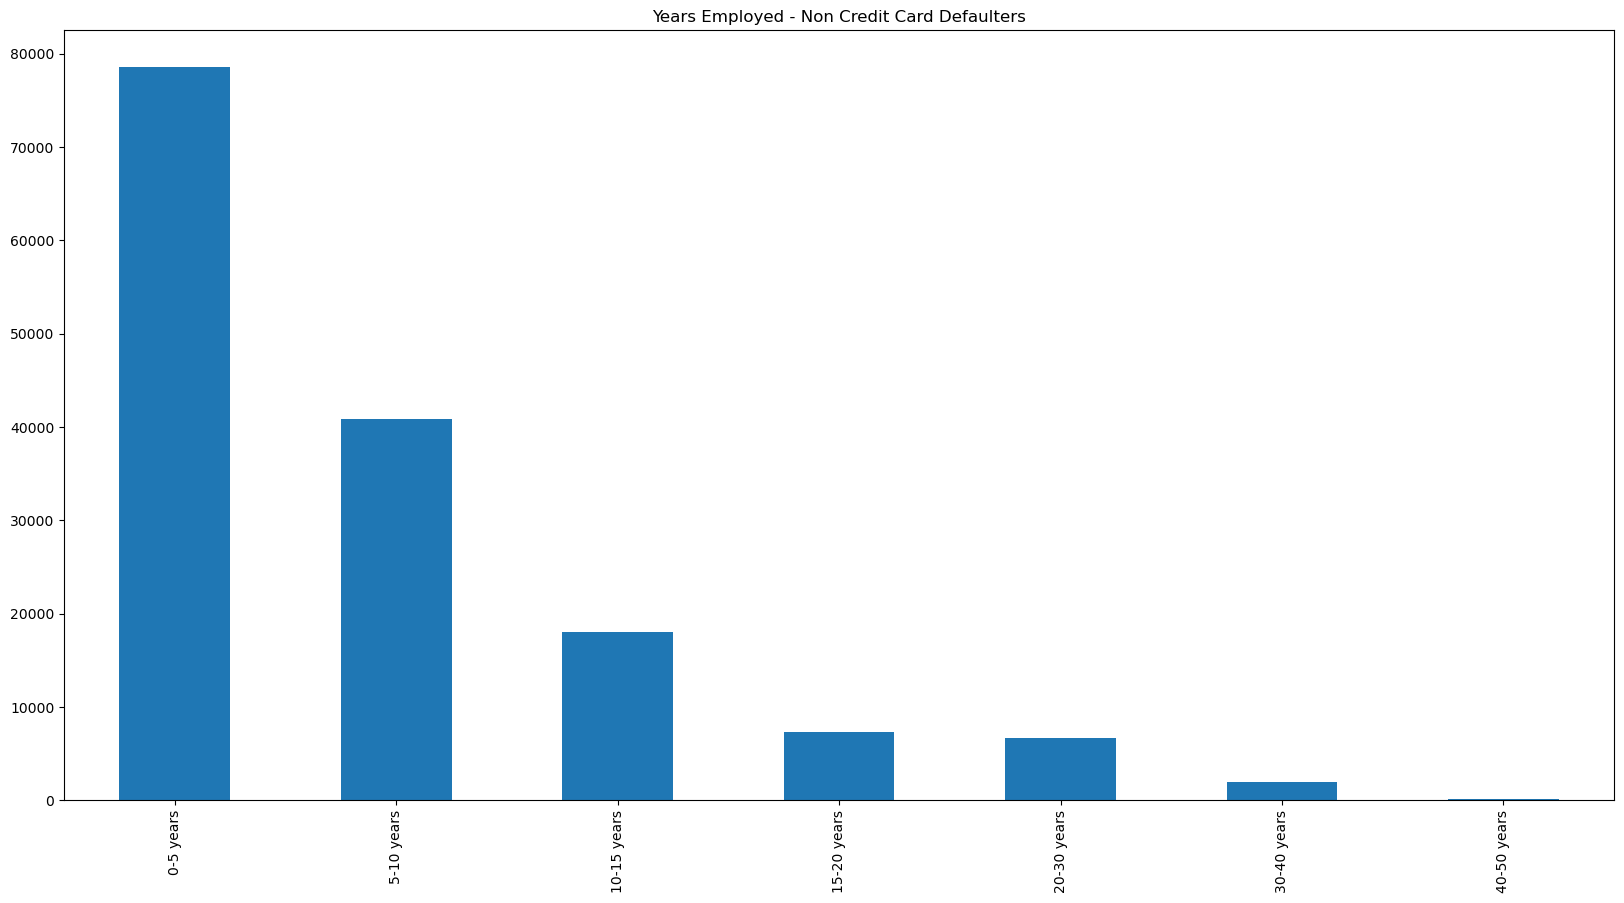

In [52]:
normal_binned = df_normal["years_employed_binned"].value_counts().sort_index().plot.bar(figsize=(20,10))
plt.title("Years Employed - Non Credit Card Defaulters")
plt.savefig('figures\\years-employed-non-credit-card-defaulters.png')

In [51]:
df_defaulters["years_employed_binned"] = pd.cut(df_defaulters['years_employed'], bins=bins_years_employed, labels=labels)

C:\Users\Rachel\AppData\Local\Temp\ipykernel_151216\2959036845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defaulters["years_employed_binned"] = pd.cut(df_defaulters['years_employed'], bins=bins_years_employed, labels=labels)


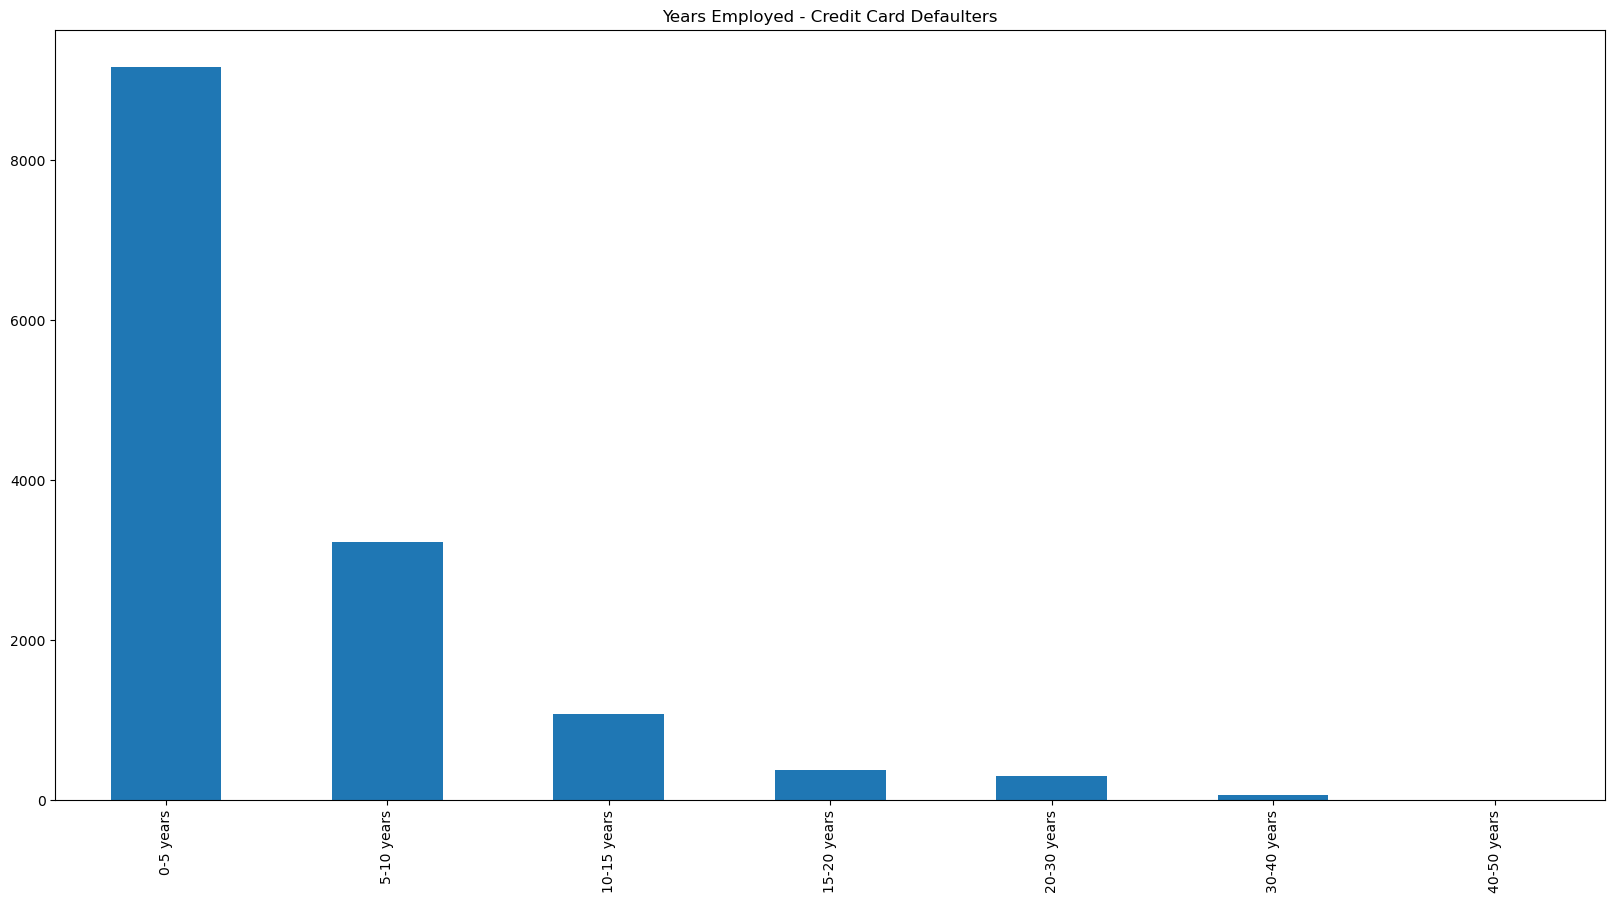

In [53]:
defaulters_binned = df_defaulters["years_employed_binned"].value_counts().sort_index().plot.bar(figsize=(20,10))
plt.title("Years Employed - Credit Card Defaulters")
plt.savefig('figures\\years-employed-credit-card-defaulters.png')

## Occupation

In [40]:
# Display the job count 
jobs = df.groupby(['OCCUPATION_TYPE'], as_index=False)['TARGET'].count()
jobs.sort_values("TARGET", ascending=False)

,OCCUPATION_TYPE,TARGET
8,Laborers,43437
14,Sales staff,24254
3,Core staff,22669
10,Managers,17787
4,Drivers,14546
6,High skill tech staff,9264
0,Accountants,8135
11,Medicine staff,7223
16,Security staff,5218
2,Cooking staff,4633


In [34]:
# Create a dataframe for the occupations of credit card defaulters
defaulter_jobs = df_defaulters.groupby(['OCCUPATION_TYPE'], as_index=False)['TARGET'].count()
sorted_defaulter_jobs = defaulter_jobs.sort_values("TARGET", ascending=False)

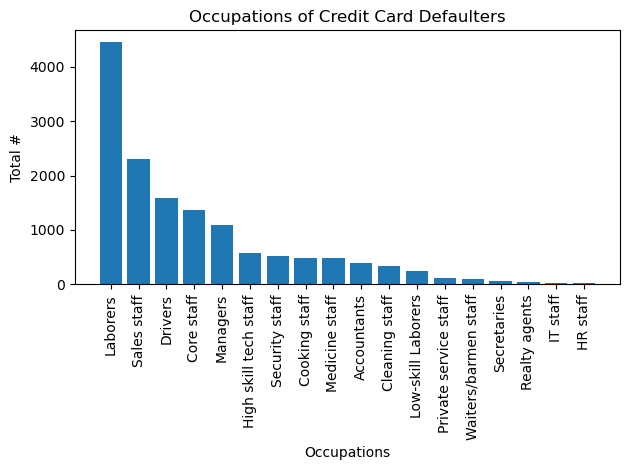

In [35]:
plt.bar(sorted_defaulter_jobs['OCCUPATION_TYPE'], sorted_defaulter_jobs['TARGET'])
plt.xticks(rotation="vertical")
plt.xlabel("Occupations")
plt.ylabel("Total #")
plt.title("Occupations of Credit Card Defaulters")
plt.tight_layout()
plt.savefig("figures\OccupationsDist-Defaulters")
plt.show()

In [36]:
# Create a dataframe for the occupations of non credit card defaulters
non_defaulter_jobs = df_normal.groupby(['OCCUPATION_TYPE'], as_index=False)['TARGET'].count()
sorted_non_defaulter_jobs = non_defaulter_jobs.sort_values("TARGET", ascending=False)

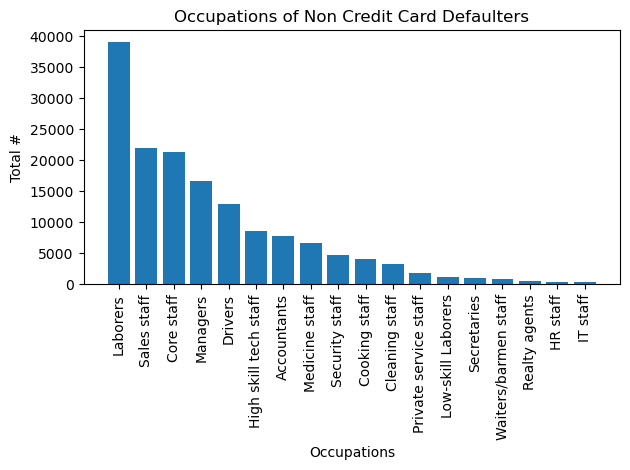

In [37]:
plt.bar(sorted_non_defaulter_jobs['OCCUPATION_TYPE'], sorted_non_defaulter_jobs['TARGET'])
plt.xticks(rotation="vertical")
plt.xlabel("Occupations")
plt.ylabel("Total #")
plt.title("Occupations of Non Credit Card Defaulters")
plt.tight_layout()
plt.savefig("figures\OccupationsDist-NonDefaulters")
plt.show()